In [8]:
#read the csv file called bank-full.csv
import csv
import sys
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import seaborn as sns


In [26]:
#read the csv file
import pandas as pd
df = pd.read_csv('bank-full.csv', sep=';')

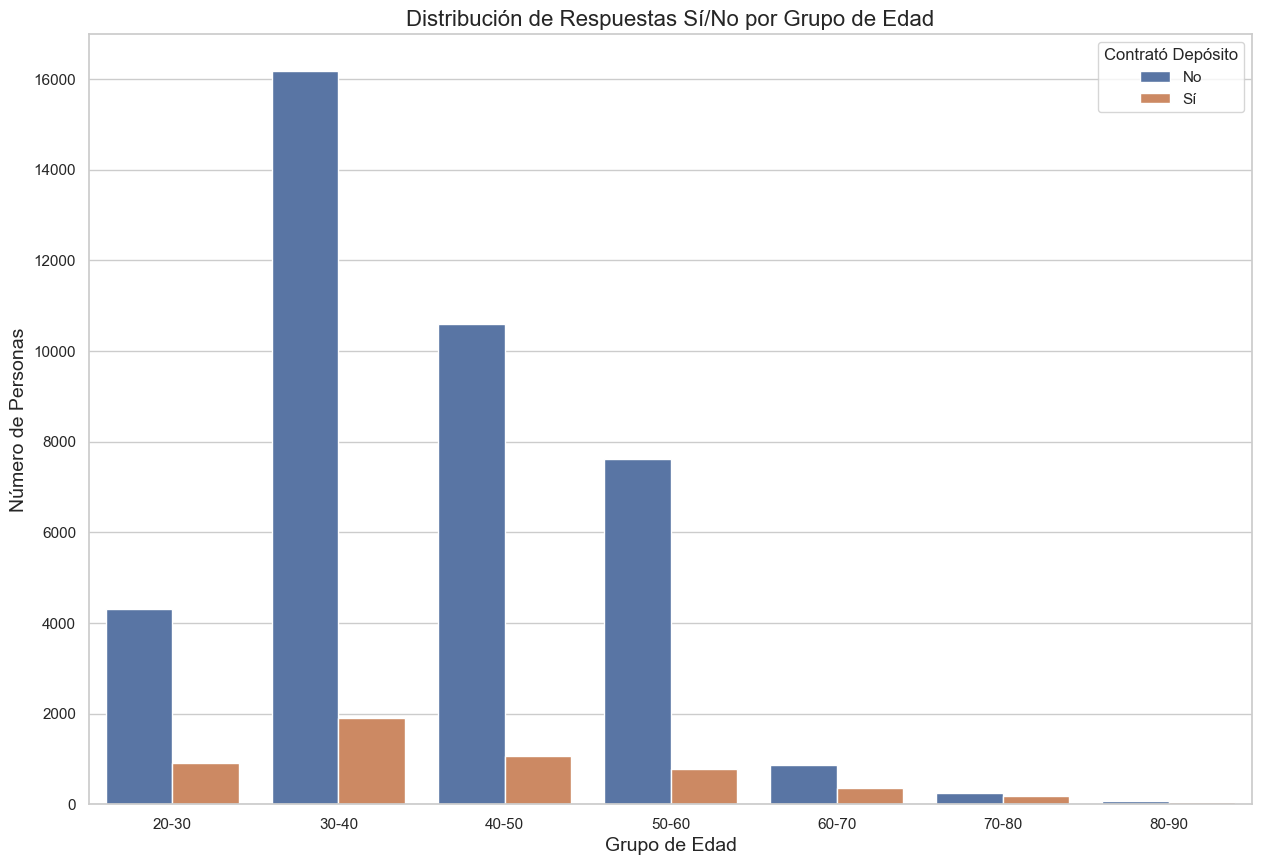

In [27]:
# Agrupar edades en intervalos
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
df2=df
df2['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Graficar usando seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Gráfico de barras para la variable 'age_group'
sns.countplot(x='age_group', hue='y', data=df2, order=labels)

# Ajustes de formato
plt.title('Distribución de Respuestas Sí/No por Grupo de Edad', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=14)
plt.ylabel('Número de Personas', fontsize=14)
plt.legend(title='Contrató Depósito', loc='upper right', labels=['No', 'Sí'])
plt.show()

In [18]:
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [18]:
#checkeamos que no hay valores nulos. 
df.isna().sum()

#describe los datos. 
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


EJERCICIO 1: Realizar un análisis descriptivo de los datos con al menos, 6 visualizaciones diferentes. 

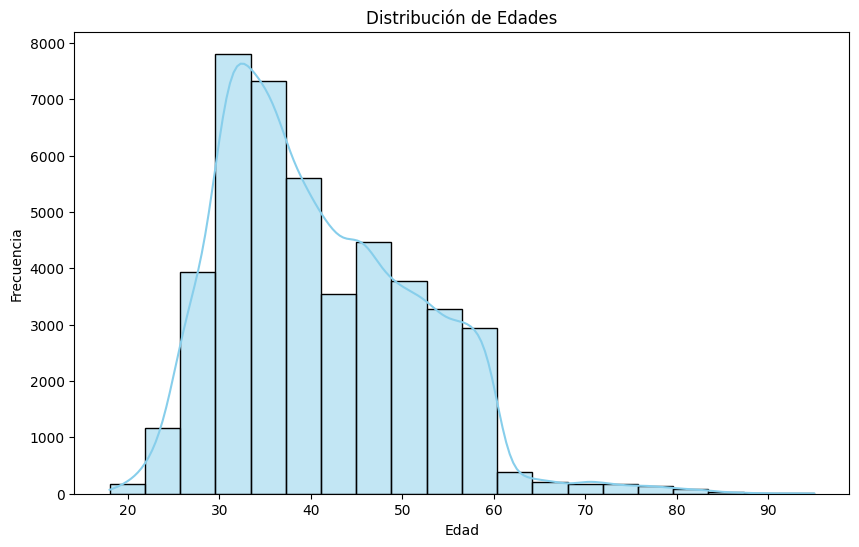

In [9]:

# 1.1) Histograma de la edad
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True, color='skyblue')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


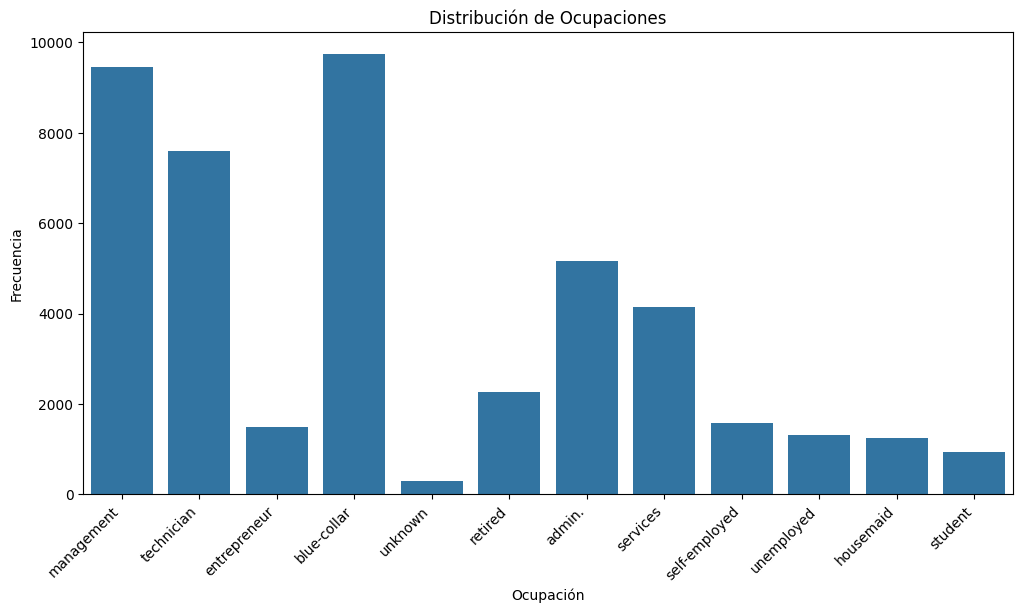

In [11]:
#1.2) Distribución de las ocupaciones 
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job')
plt.title('Distribución de Ocupaciones')
plt.xlabel('Ocupación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

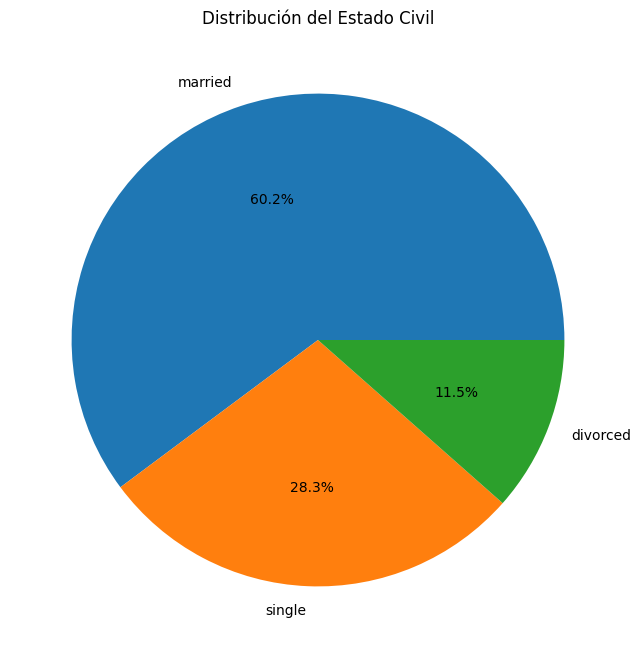

In [13]:
#1.3 ) Distribución del estado civil de los usuarios. 
plt.figure(figsize=(8, 8))
df['marital'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribución del Estado Civil')
plt.ylabel('')
plt.show()



In [21]:
import plotly.express as px
import plotly.graph_objects as go
 
# Boxplot
fig = go.Figure()

fig.add_trace(
    go.Box(
        x = df["balance"],
        marker_color = "gold",
        name = "Balance Medio Anual",
        boxpoints='all',
        boxmean=True
    )
)

fig.update_layout(title = "Distribución de los balances de los usuarios", yaxis_title = "")

fig.show()

In [25]:
# 1.5 ) Correlación entre las variables que son numéricas 
px.imshow(df.corr())




C:\Users\beatr\AppData\Local\Temp\ipykernel_22620\696369520.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



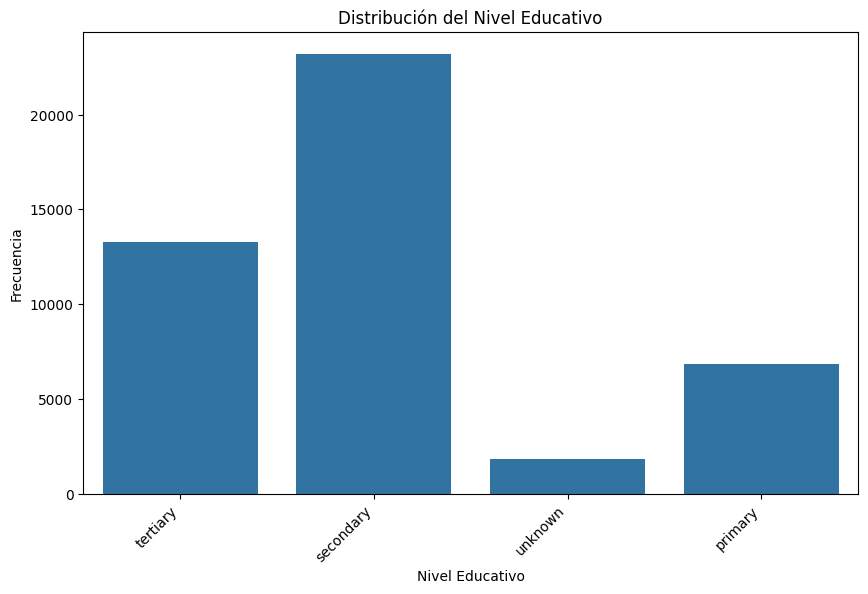

In [24]:
#1.6) Distribución del nivel educativo que tienen los usuarios 
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education')
plt.title('Distribución del Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

EJERCICIO 2: Montar un dashboard con al menos, 4 visualizaciones diferentes, que incluyan 2 componentes interactivas y 1 callback (5 Puntos) (*)

In [ ]:
#Para analizar las características del tipo de clientes que influyen más en que contraten o no, voy a usar Random Forest

   age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   58        0     2143        1     0    5       261         1     -1   
1   44        0       29        1     0    5       151         1     -1   
2   33        0        2        1     1    5        76         1     -1   
3   47        0     1506        1     0    5        92         1     -1   
4   33        0        1        0     0    5       198         1     -1   

   previous  ...  month_jul  month_jun  month_mar  month_may  month_nov  \
0         0  ...          0          0          0          1          0   
1         0  ...          0          0          0          1          0   
2         0  ...          0          0          0          1          0   
3         0  ...          0          0          0          1          0   
4         0  ...          0          0          0          1          0   

   month_oct  month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0          0        

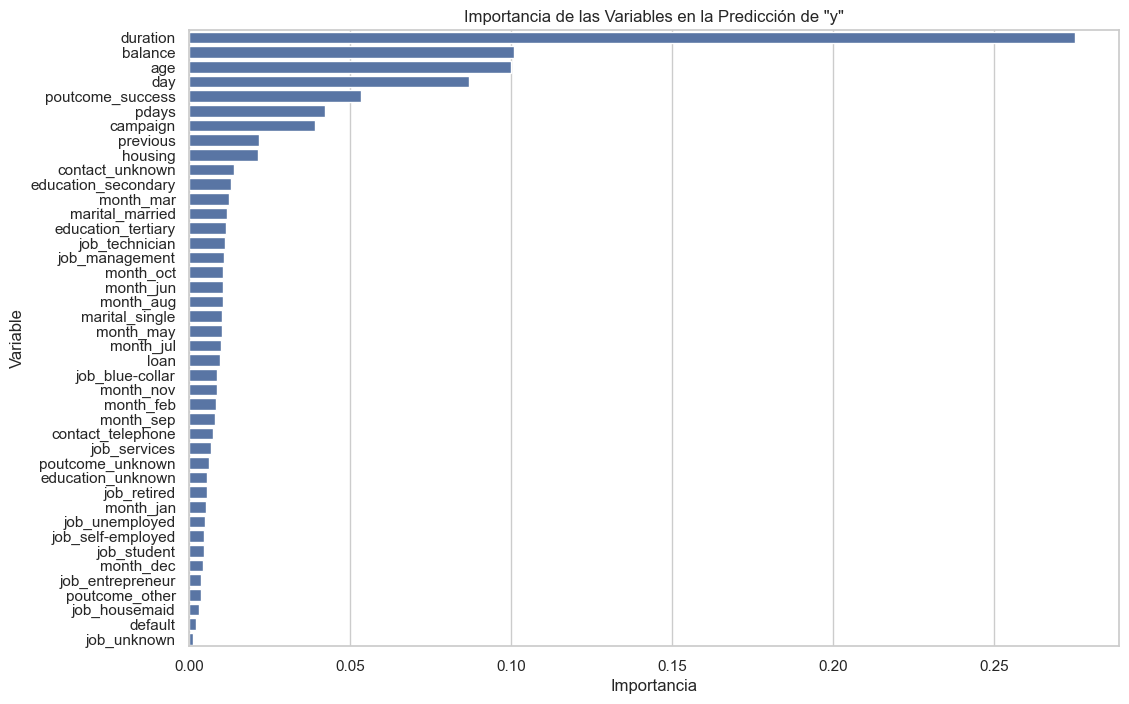

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
nominal_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
binary_features = ['default', 'housing', 'loan']

df = pd.get_dummies(df, columns=nominal_features, drop_first=True)
df[binary_features] = df[binary_features].replace({'no': 0, 'yes': 1})

df['y'] = df['y'].replace({'no': 0, 'yes': 1})
print(df.head())

X = df.drop('y', axis=1)
y = df['y']

#Divido en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#Entrenar el modelo
rf_model.fit(X_train, y_train)

#Obtener la importancia de las variables
feature_importances = rf_model.feature_importances_

#Crear un DataFrame para visualizar la importancia de las variables
feature_importance_df = pd.DataFrame({'Variable': X.columns, 'Importancia': feature_importances})

#Ordenar el DataFrame por importancia de variables
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Visualizar la importancia de las variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', data=feature_importance_df)
plt.title('Importancia de las Variables en la Predicción de "y"')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()


In [17]:

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#leo los datos
df = pd.read_csv('bank-full.csv', sep=';')


app = dash.Dash(__name__)

#layout
app.layout = html.Div([
    html.H1(children='RESUMEN DE LA CAMPAÑA', style={'color':'white', 'textAlign':'center', 'background-color':'blue'}),
    html.H3(children='Seleccione un rango de balance anual medio para ver el resumen de la campaña', style={'color':'white', 'textAlign':'center', 'background-color':'blue'}),

    # slider para ingresos
    dcc.Slider(
        id='income-slider',
        min=df['balance'].min(),
        max=df['balance'].max(),
        step=1000,
        marks={i: f'{i:,}' for i in range(int(df['balance'].min()), int(df['balance'].max())+1, 10000)},
        value=df['balance'].min(),
        tooltip={'placement': 'bottom', 'always_visible': True}
    ),
    # grafico que enseña count de la variable y.
    dcc.Graph(id='count-plot'),
    # Gráfico de barras para la importancia de las variables
    dcc.Graph(id='feature-importance-plot'),
    # gráfico que nos enseña el numero de hipotecas que se tienen 
    dcc.Graph(id='housing-plot'),
    #grafico que nos esnseña cuantos tienen un prestamo personal
    dcc.Graph(id='loan-plot'),



])

# Para que los gráficos se actualice según el input. 
@app.callback(
    [Output('count-plot', 'figure'),
     Output('feature-importance-plot', 'figure'),
     Output('housing-plot', 'figure'),
     Output('loan-plot', 'figure')], 
    [Input('income-slider', 'value')]
)
def update_plots(income_threshold):
    # Filtrar el DataFrame por ingresos mayores que el umbral seleccionado
    filtered_df = df[df['balance'] > income_threshold]

    # Crear el gráfico de barras con Plotly Express para la distribución de la respuesta
    count_plot = px.histogram(filtered_df, x='y', title=f'Distribución de la respuesta si el balance anual es mayor que: {income_threshold}',
                              labels={'y': 'Respuesta a la campaña', 'count': 'Número de personas'},
                              category_orders={'y': ['no', 'yes']})
    count_plot.update_layout(bargap=0.2)  # Ajustar el espacio entre las barras

    #Para la importancia de las variables... 
    numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
    nominal_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    binary_features = ['default', 'housing', 'loan']

    filtered_df = pd.get_dummies(filtered_df, columns=nominal_features, drop_first=True)
    filtered_df[binary_features] = filtered_df[binary_features].replace({'no': 0, 'yes': 1})

    filtered_df['y'] = filtered_df['y'].replace({'no': 0, 'yes': 1})

    X = filtered_df.drop('y', axis=1)
    y = filtered_df['y']

#Divido en train y test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Actualizar el modelo y obtener la importancia de las variables
    rf_model.fit(X_train, y_train)
    #Obtener la importancia de las variables
    feature_importances = rf_model.feature_importances_
    # Crear un DataFrame para visualizar la importancia de las variables
    feature_importance_df = pd.DataFrame({'Variable': X.columns, 'Importancia': feature_importances})

    # Ordenar el DataFrame por importancia de variables
    feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

    # Crear el gráfico de barras con Plotly Express para la importancia de las variables
    feature_importance_plot = px.bar(feature_importance_df, x='Importancia', y='Variable', orientation='h',
                                     title=f'Importancia de las Variables en la Predicción de y si el balance anual es mayor que: {income_threshold}',
                                     labels={'Importancia': 'Importancia', 'Variable': 'Variable'})
    

    # Gráfico de pie para la variable housing 
    housing_plot = px.pie(filtered_df, names='housing', title=f'Distribución de la variable housing si el balance anual es mayor que: {income_threshold}',
                          labels={'housing': 'Housing'}, color_discrete_sequence=['lightblue', 'lightcoral'])
    
    # Gráfico de pie para la variable loan

    loan_plot = px.pie(filtered_df, names='loan', title=f'Distribución de la variable loan si el balance anual es mayor que: {income_threshold}',
                          labels={'loan': 'Loan'}, color_discrete_sequence=['lightblue', 'lightcoral'])
    

    return count_plot, feature_importance_plot, housing_plot, loan_plot



# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)


EJERCICIO 3: 
Concluir todo este análisis haciendo recomendaciones para la mejora de futuras campañas de contacto directo a partir de los resultados obtenidos de los análisis realizados con los datos. (2 Puntos)

In [28]:

#lo he hecho en un word.